# ---------------------------------- Outlier Detection for Diabetes ----------------------------------

## What characteristics of a diabetic are considered anomalous?

# Introduction/Overview

<font size="3">After looking through the scientific paper, "Differentially Private Outlier Detection in a Collaborative Environment", I wanted to implement an attribute value frequency (AVF) based outlier detection algorithm onto a dataset in order to determine what is considered anomalous. The dataset chosen was the Pima Indians Diabetes Dataset from Kaggle. I'm interested in healthcare and wanted to see how well this would perform on a health related dataset.</font>

## Import Libraries

In [2]:
#import libraries
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import dataset, https://www.kaggle.com/uciml/pima-indians-diabetes-database/discussion/24182

In [4]:
x = pd.read_csv("C:/Users/RBS/Desktop/diabetes.csv")

## Exploratory Data Analysis

In [5]:
x.shape

(768, 9)

In [6]:
datadict = pd.DataFrame(x.dtypes)
datadict

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
x.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
x.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
246,10,122,68,0,0,31.2,0.258,41,0
604,4,183,0,0,0,28.4,0.212,36,1
143,10,108,66,0,0,32.4,0.272,42,1
294,0,161,50,0,0,21.9,0.254,65,0
93,4,134,72,0,0,23.8,0.277,60,1


### Missing Values

In [11]:
x.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Univariate Analysis

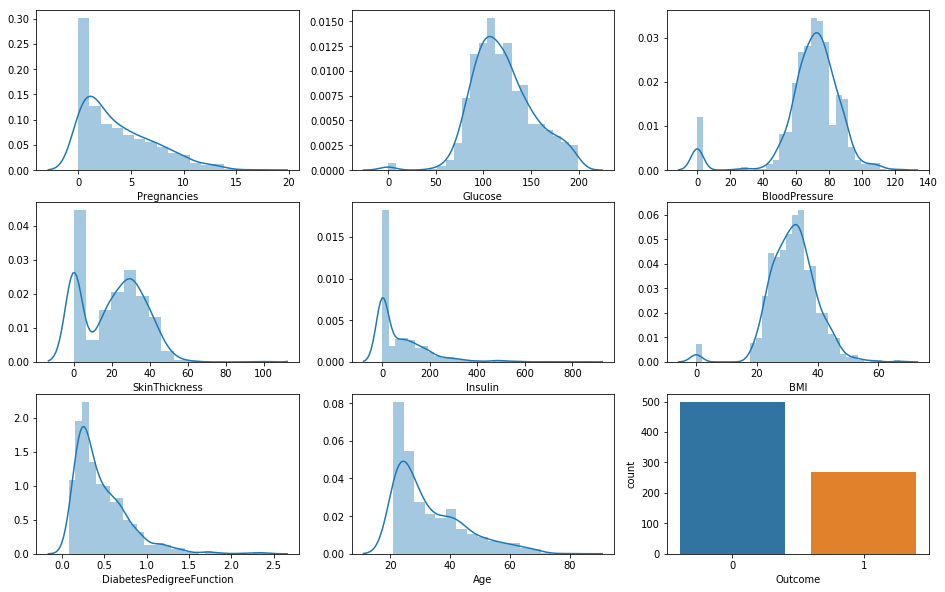

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

sns.distplot(x['Pregnancies'],ax=axes[0,0])
sns.distplot(x['Glucose'],ax=axes[0,1])
sns.distplot(x['BloodPressure'],ax=axes[0,2])
sns.distplot(x['SkinThickness'],ax=axes[1,0])
sns.distplot(x['Insulin'],ax=axes[1,1])
sns.distplot(x['BMI'],ax=axes[1,2])
sns.distplot(x['DiabetesPedigreeFunction'],ax=axes[2,0])
sns.distplot(x['Age'],ax=axes[2,1])
sns.countplot('Outcome',data= x ,ax=axes[2,2])


### Bivariate Analysis

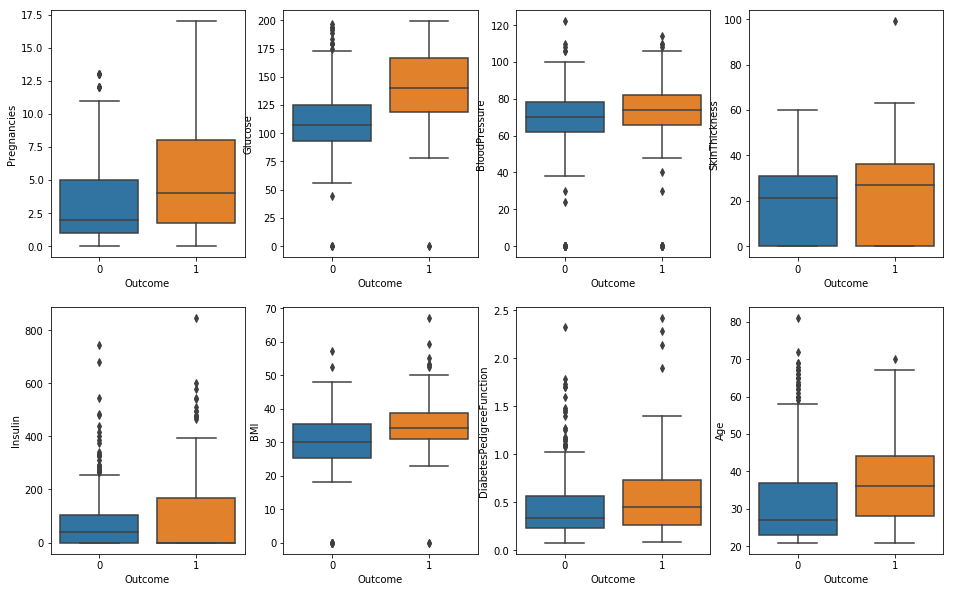

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.boxplot(x="Outcome", y="Pregnancies", data=x,ax=axes[0,0])
sns.boxplot(x="Outcome", y="Glucose", data=x,ax=axes[0,1])
sns.boxplot(x="Outcome", y="BloodPressure", data=x,ax=axes[0,2])
sns.boxplot(x="Outcome", y="SkinThickness", data=x,ax=axes[0,3])
sns.boxplot(x="Outcome", y="Insulin", data=x,ax=axes[1,0])
sns.boxplot(x="Outcome", y="BMI", data=x,ax=axes[1,1])
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=x,ax=axes[1,2])
sns.boxplot(x="Outcome", y="Age", data=x,ax=axes[1,3])


### Correlation  

In [14]:
x.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


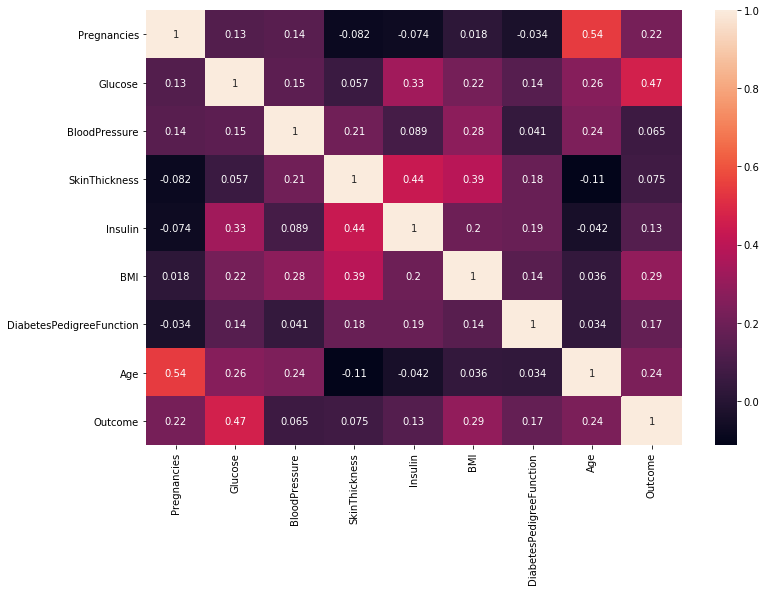

In [15]:
plt.figure(figsize=(12, 8))

sns.heatmap(x.corr(),annot = True)

## AVF Outlier Detection

<img src="AVFS Algorithm.png"/>

In [17]:
#Get AVF Score 

AVF_list = []
columns = list(x.columns)
for i in range(len(x)):
    freq_sum = []   
    for c in range(len(columns)):
        
        #gets frequency of each unique value from data per column, stores in dataframe  
        freq_table = pd.DataFrame(x[columns[c]].value_counts()) 
        
        #moves frequency values from index to value column, fixes format of the table     
        freq_table['value'] = freq_table.index       
        
        #gets value from a cell  
        value = x.iloc[i,c]
       
        #gets frequency associated with value of cell
        freq = freq_table[columns[c]][value] 
     
        #appends each frequency to a list to later sum
        freq_sum.append(freq)     
   
    #takes sum of frequencies for each attribute and divides by # of columns, this is done per record 
    AVF = sum(freq_sum)/len(columns)
    
    #create a list of each AVF score per record and add all records to AVF column
    AVF_list.append(AVF)
    
x["AVF"]= AVF_list 

### Top 10% of Outliers

In [18]:
#Sort dataset least to greatest by AVF score
o = x.sort_values("AVF")

#Top 10% of outliers

k = round(len(x)*.1)
outliers = o.iloc[:k]
outliers

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AVF
43,9,171,110,24,240,45.4,0.721,54,1,36.000000
24,11,143,94,33,146,36.6,0.254,51,1,36.777778
375,12,140,82,43,325,39.2,0.528,58,1,36.888889
458,10,148,84,48,237,37.6,1.001,51,1,37.555556
254,12,92,62,7,258,27.6,0.926,44,1,37.666667
159,17,163,72,41,114,40.9,0.817,47,1,38.000000
662,8,167,106,46,231,37.6,0.165,43,1,38.111111
323,13,152,90,33,29,26.8,0.731,43,1,38.111111
516,9,145,88,34,165,30.3,0.771,53,1,38.333333
53,8,176,90,34,300,33.7,0.467,58,1,39.111111


## Univariate Analysis of Outliers

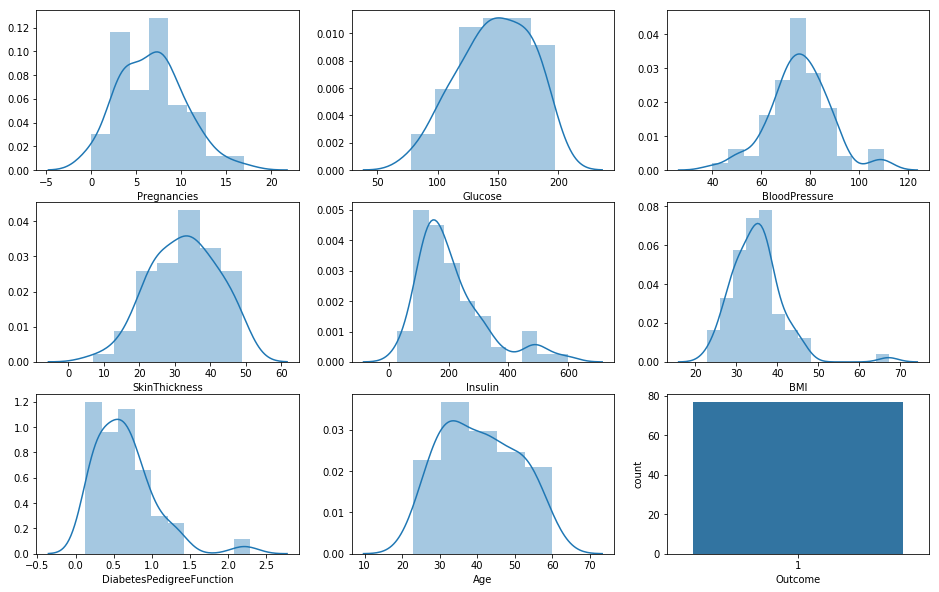

In [19]:
fig, axes = plt.subplots(3, 3, figsize=(16, 10))

sns.distplot(outliers['Pregnancies'],ax=axes[0,0])
sns.distplot(outliers['Glucose'],ax=axes[0,1])
sns.distplot(outliers['BloodPressure'],ax=axes[0,2])
sns.distplot(outliers['SkinThickness'],ax=axes[1,0])
sns.distplot(outliers['Insulin'],ax=axes[1,1])
sns.distplot(outliers['BMI'],ax=axes[1,2])
sns.distplot(outliers['DiabetesPedigreeFunction'],ax=axes[2,0])
sns.distplot(outliers['Age'],ax=axes[2,1])
sns.countplot('Outcome',data= outliers,ax=axes[2,2])

## Bivariate Analysis of Outliers 

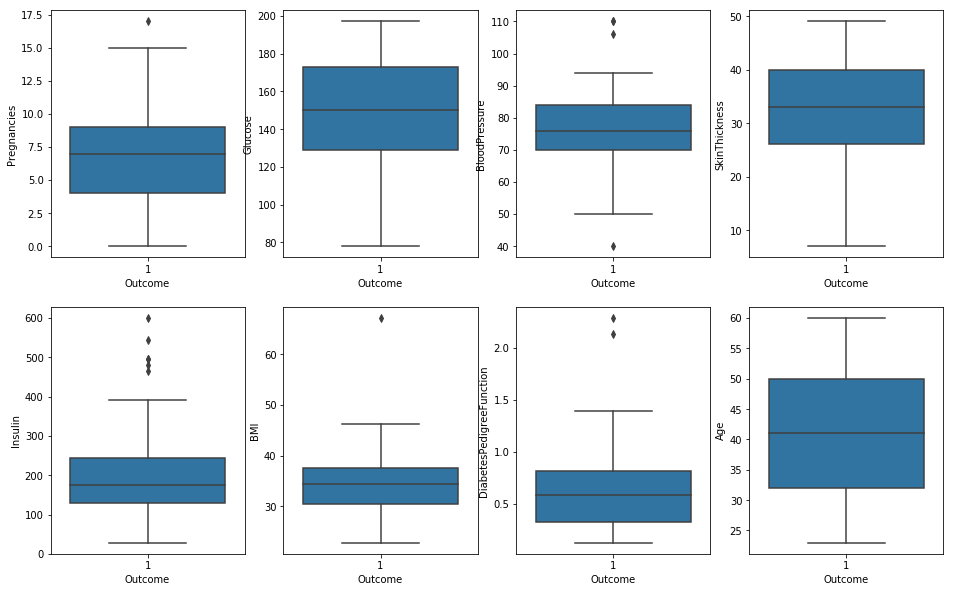

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.boxplot(x="Outcome", y="Pregnancies", data=outliers,ax=axes[0,0])
sns.boxplot(x="Outcome", y="Glucose", data=outliers,ax=axes[0,1])
sns.boxplot(x="Outcome", y="BloodPressure", data=outliers,ax=axes[0,2])
sns.boxplot(x="Outcome", y="SkinThickness", data=outliers,ax=axes[0,3])
sns.boxplot(x="Outcome", y="Insulin", data=outliers,ax=axes[1,0])
sns.boxplot(x="Outcome", y="BMI", data=outliers,ax=axes[1,1])
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=outliers,ax=axes[1,2])
sns.boxplot(x="Outcome", y="Age", data=outliers,ax=axes[1,3])

## Top 10% of Non-Outliers

In [21]:
#Sort dataset greatest to least by AVF score
n = x.sort_values("AVF", ascending = False)
#Number of normal
#10%
k = round(len(x)*.1)
norm = n.iloc[:k]
norm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AVF
101,1,151,60,0,0,26.1,0.179,22,0,150.555556
697,0,99,0,0,0,25.0,0.253,22,0,149.222222
626,0,125,68,0,0,24.7,0.206,21,0,149.000000
196,1,105,58,0,0,24.3,0.187,21,0,148.888889
627,0,132,78,0,0,32.4,0.393,21,0,148.444444
624,2,108,64,0,0,30.8,0.158,21,0,148.222222
758,1,106,76,0,0,37.5,0.197,26,0,147.555556
81,2,74,0,0,0,0.0,0.102,22,0,147.444444
60,2,84,0,0,0,0.0,0.304,21,0,147.444444
513,2,91,62,0,0,27.3,0.525,22,0,147.111111


## Univariate Analysis without Outliers

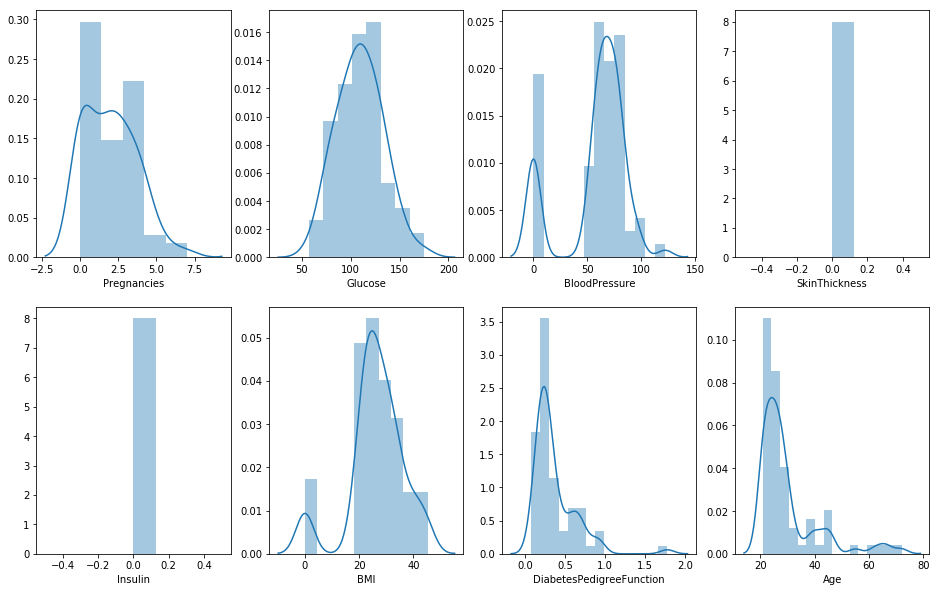

In [25]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))

sns.distplot(norm['Pregnancies'],ax=axes[0,0])
sns.distplot(norm['Glucose'],ax=axes[0,1])
sns.distplot(norm['BloodPressure'],ax=axes[0,2])
sns.distplot(norm['SkinThickness'],ax=axes[0,3])
sns.distplot(norm['Insulin'],ax=axes[1,0])
sns.distplot(norm['BMI'],ax=axes[1,1])
sns.distplot(norm['DiabetesPedigreeFunction'],ax=axes[1,2])
sns.distplot(norm['Age'],ax=axes[1,3])

## Biunivariate Analysis without Outliers

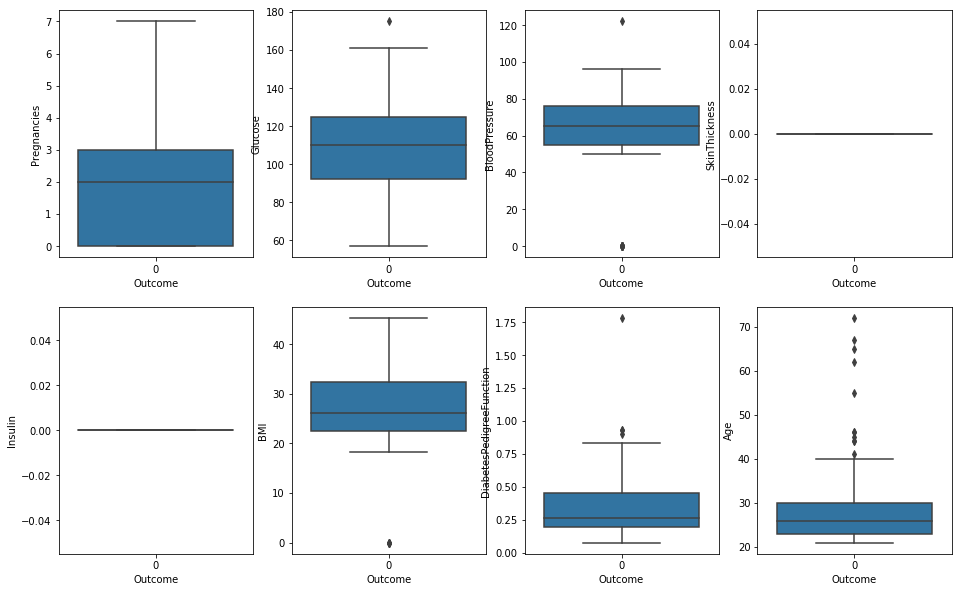

In [23]:
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
sns.boxplot(x="Outcome", y="Pregnancies", data=norm,ax=axes[0,0])
sns.boxplot(x="Outcome", y="Glucose", data=norm,ax=axes[0,1])
sns.boxplot(x="Outcome", y="BloodPressure", data=norm,ax=axes[0,2])
sns.boxplot(x="Outcome", y="SkinThickness", data=norm,ax=axes[0,3])
sns.boxplot(x="Outcome", y="Insulin", data=norm,ax=axes[1,0])
sns.boxplot(x="Outcome", y="BMI", data=norm,ax=axes[1,1])
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=norm,ax=axes[1,2])
sns.boxplot(x="Outcome", y="Age", data=norm,ax=axes[1,3])

# So what characteristics of a diabetic are considered anomalous?

<font size="3">Based on the data provided, it appears the characteristics of what is considered anamolous are patients with a high frequency of pregnancies, glucose levels, blood pressure, skin thickness, insulin, BMI and are between the ages of 33-50. These outliers all appear to have been diagnosed with diabetes while non-outliers all appear to not have diabetes. In contrast non-outliers across all attributes have a significantly lower frequency of these characteristics. Overall the AVF algorithm performed well in identifying outliers and highlighted the key features of a patient that deviated from the norm.</font>

## References

1. Asif, H., Talukdar, T., Vaidya, J., Shafiq, B. & Adam, N. Collaborative Differentially Private Outlier Detection for Categorical Data. 2016 IEEE 2nd International Conference on Collaboration and Internet Computing (CIC) (2016). doi:10.1109/cic.2016.025